In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline 
import requests 
import numpy as np
import pandas as pd
from StringIO import StringIO
import matplotlib.pyplot as plt
import datetime as dt
from collections import OrderedDict
import scipy as sp
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
import math
import bs4
from BeautifulSoup import BeautifulSoup
import urllib2
from investUrl import invest_url as iu
import re

In [2]:
# -*- coding: utf-8 -*-
FFamily = pd.DataFrame(columns=['Fund_Family', 'InvestfundsUrl'])

FFamily.loc[0] = [u'СБЕРБАНК УПРАВЛЕНИЕ АКТИВАМИ', iu('/uk/34/')]
FFamily.loc[1] = [u'АЛЬФА-КАПИТАЛ', iu('/uk/5/')]
FFamily.loc[2] = [u'РАЙФФАЙЗЕН КАПИТАЛ', iu('/uk/112/')]
FFamily.loc[3] = [u'ГАЗПРОМБАНК — УПРАВЛЕНИЕ АКТИВАМИ', iu('/uk/184/')]
FFamily.loc[4] = [u'УРАЛСИБ', iu('/uk/21/')]
FFamily.loc[5] = [u'РСХБ УПРАВЛЕНИЕ АКТИВАМИ', iu('/uk/1581/')]
FFamily.loc[6] = [u'СИСТЕМА КАПИТАЛ', iu('/uk/1329/')]
FFamily.loc[7] = [u'АТОН-МЕНЕДЖМЕНТ', iu('/uk/7/')]
FFamily.loc[8] = [u'ТРАНСФИНГРУП', iu('/uk/53/')]
FFamily.loc[9] = [u'ОТКРЫТИЕ', iu('/uk/20/')]

In [3]:
FFamily

,Fund_Family,InvestfundsUrl
0,СБЕРБАНК УПРАВЛЕНИЕ АКТИВАМИ,https://investfunds.ru/uk/34/
1,АЛЬФА-КАПИТАЛ,https://investfunds.ru/uk/5/
2,РАЙФФАЙЗЕН КАПИТАЛ,https://investfunds.ru/uk/112/
3,ГАЗПРОМБАНК — УПРАВЛЕНИЕ АКТИВАМИ,https://investfunds.ru/uk/184/
4,УРАЛСИБ,https://investfunds.ru/uk/21/
5,РСХБ УПРАВЛЕНИЕ АКТИВАМИ,https://investfunds.ru/uk/1581/
6,СИСТЕМА КАПИТАЛ,https://investfunds.ru/uk/1329/
7,АТОН-МЕНЕДЖМЕНТ,https://investfunds.ru/uk/7/
8,ТРАНСФИНГРУП,https://investfunds.ru/uk/53/
9,ОТКРЫТИЕ,https://investfunds.ru/uk/20/


In [4]:
Funds_family = pd.DataFrame(columns=['Fund_Name', 'Fund_Family', 'Fund_Url'])
i = 0

for index in range(0, len(FFamily)):
    contenturl = FFamily.InvestfundsUrl[index]
    req = urllib2.Request(contenturl)
    page = urllib2.urlopen(req)
    soup = BeautifulSoup(page)
    data = soup.find("div", {"data-modul": "funds"})
    table = data and data.find("table", {"class": "table_data full"})
    tr = table and table.findAll("tr")
    for row in range(1, len(tr)):
        url = tr and tr[row].find("a")
        fund_name = url and url.contents[0]
        fund_name = fund_name and fund_name.strip() != "" and fund_name.strip()
        Funds_family.loc[i] = fund_name and [fund_name, FFamily['Fund_Family'][index], iu(url['href'])]
        i += 1

In [5]:
Funds_family.head()

,Fund_Name,Fund_Family,Fund_Url
0,Сбербанк – Фонд перспективных облигаций,СБЕРБАНК УПРАВЛЕНИЕ АКТИВАМИ,https://investfunds.ru/funds/366/
1,Сбербанк – Фонд облигаций Илья Муромец,СБЕРБАНК УПРАВЛЕНИЕ АКТИВАМИ,https://investfunds.ru/funds/47/
2,Сбербанк – Природные ресурсы,СБЕРБАНК УПРАВЛЕНИЕ АКТИВАМИ,https://investfunds.ru/funds/641/
3,Сбербанк – Глобальный Интернет,СБЕРБАНК УПРАВЛЕНИЕ АКТИВАМИ,https://investfunds.ru/funds/2233/
4,Сбербанк - Еврооблигации,СБЕРБАНК УПРАВЛЕНИЕ АКТИВАМИ,https://investfunds.ru/funds/3125/


In [6]:
# -*- coding: utf-8 -*-
print u"Общее количество фондов: ", len(Funds_family)

Общее количество фондов:  181


In [7]:
fund_family_rating_columns = ['Fund_Family', 'Rating']
fund_family_rating = pd.DataFrame(columns=fund_family_rating_columns)

expert_rate_url = 'http://pif.investfunds.ru/funds/expertrate.phtml'
req = urllib2.Request(expert_rate_url)
page = urllib2.urlopen(req)
soup = BeautifulSoup(page)
content_inner = soup and soup.find("div", {"class": "content-inner"})
content_table = content_inner and content_inner.find("div", {"class": "content-table-text"})
block = content_table and content_table.find("div", {"class": "block-win"})
table = block and block.find("table", {"class": "table-data"})
trs = table and table.findAll("tr")
i = 0
for row in range(1, len(trs)):
    td_name = trs[row] and trs[row].findAll("td", {"class": "tblc-name"})
    td_name = td_name and td_name[0]
    if td_name and td_name.find("table"):
        link = td_name and td_name.find("a")
        if link is not None:
            td_rank = trs[row] and trs[row].findAll("td", {"class": "tblc-name"})
            td_rank_1 = td_rank and td_rank[1].text
            td_rank_2 = td_rank_1 and re.search(r'[A-Z]\+*', td_rank_1).group(0)
            link_contents = link and link.contents[0]
            fund_family_rating.loc[i] = [link_contents.upper(), td_rank_2]
        i += 1

In [8]:
fund_family_rating

,Fund_Family,Rating
0,АЛЬФА-КАПИТАЛ,A++
1,ВТБ КАПИТАЛ УПРАВЛЕНИЕ АКТИВАМИ,A++
2,ГАЗПРОМБАНК — УПРАВЛЕНИЕ АКТИВАМИ,A++
3,ИНГОССТРАХ - ИНВЕСТИЦИИ,A++
4,КАПИТАЛЪ,A++
5,КАПИТАЛЪ УПРАВЛЕНИЕ АКТИВАМИ,A++
6,"РЕГИОН ПОРТФЕЛЬНЫЕ ИНВЕСТИЦИИ, ООО",A++
7,"РЕГИОН ТРАСТ, ООО",A++
8,"РЕГИОН ЭСМ, АО",A++
9,СБЕРБАНК УПРАВЛЕНИЕ АКТИВАМИ,A++


In [9]:
fund_df = pd.merge(Funds_family, fund_family_rating, how='left', on='Fund_Family')
fund_df = fund_df[fund_df['Rating'].notnull()].reset_index(drop="False")

In [10]:

fund_df.head()

,Fund_Name,Fund_Family,Fund_Url,Rating
0,Сбербанк – Фонд перспективных облигаций,СБЕРБАНК УПРАВЛЕНИЕ АКТИВАМИ,https://investfunds.ru/funds/366/,A++
1,Сбербанк – Фонд облигаций Илья Муромец,СБЕРБАНК УПРАВЛЕНИЕ АКТИВАМИ,https://investfunds.ru/funds/47/,A++
2,Сбербанк – Природные ресурсы,СБЕРБАНК УПРАВЛЕНИЕ АКТИВАМИ,https://investfunds.ru/funds/641/,A++
3,Сбербанк – Глобальный Интернет,СБЕРБАНК УПРАВЛЕНИЕ АКТИВАМИ,https://investfunds.ru/funds/2233/,A++
4,Сбербанк - Еврооблигации,СБЕРБАНК УПРАВЛЕНИЕ АКТИВАМИ,https://investfunds.ru/funds/3125/,A++


In [11]:
fund_df.to_csv("Fund_Metadata.csv", encoding='utf-8')

In [12]:
import json
headers = {'content-type': 'application/json'}
test_url = fund_df['Fund_Url'][0]
chart = 'chartData'
data_key = ['sca', 'pay']
date_from = '16.11.2013'
url_1 = test_url + '?action=chartData&data_key=' + data_key[1] + '&date_from=' + date_from
req = urllib2.Request(url_1, None, {'Content-Type': 'application/json'})
response = urllib2.urlopen(req)
data = response.read()

if data:
    json_data = json.loads(data)

In [13]:
fund_pay = json_data['data']
fund_name = json_data['name']
date_format = json_data['tooltip']['xDateFormat']
fund_pays = pd.DataFrame(columns=['Date', 'Value'])

for i in range(0, len(fund_pay)):
    date = fund_pay[i][0]
    date = dt.datetime.utcfromtimestamp(date / 1e3)
    date_formatted = date.strftime(date_format)
    value = fund_pay[i][1]
    fund_pays.loc[i] = [date_formatted, value]

In [14]:
print fund_name
fund_pays.head()

Сбербанк – Фонд перспективных облигаций


,Date,Value
0,17.11.2013,2358.41
1,18.11.2013,2359.98
2,19.11.2013,2360.51
3,20.11.2013,2361.61
4,21.11.2013,2358.11


In [15]:
fund_pays.to_csv("FPO_pays.csv", encoding='utf-8')

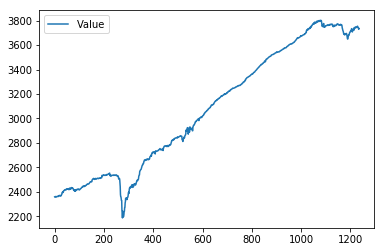

In [16]:
fund_pays.plot.line()

In [17]:
url_2 = test_url + '?action=chartData&data_key=' + data_key[0] + '&date_from=' + date_from
req = urllib2.Request(url_2, None, {'Content-Type': 'application/json'})
response = urllib2.urlopen(req)
data = response.read()

if data:
    json_nav = json.loads(data)

In [18]:
fund_nav = json_nav['data']
fund_navs = pd.DataFrame(columns=['Date', 'Value'])

for i in range(0, len(fund_nav)):
    date = fund_nav[i][0]
    date = dt.datetime.utcfromtimestamp(date / 1e3)
    date_formatted = date.strftime(date_format)
    value = fund_nav[i][1]
    fund_navs.loc[i] = [date_formatted, value]

In [19]:
print fund_name
fund_navs.head()

Сбербанк – Фонд перспективных облигаций


,Date,Value
0,17.11.2013,2.181816e+09
1,18.11.2013,2.170786e+09
2,19.11.2013,2.167157e+09
3,20.11.2013,2.170377e+09
4,21.11.2013,2.155517e+09


In [20]:
fund_navs.to_csv("FPO_navs.csv", encoding='utf-8')

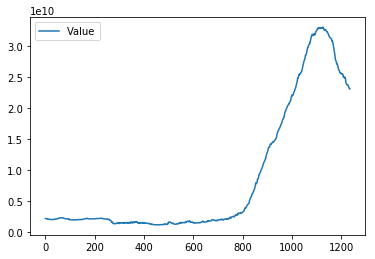

In [21]:
fund_navs.plot.line()

In [22]:
# -*- coding: utf-8 -*-
Funds_coefs = pd.DataFrame(columns=['Fund_Name', u'Коэффициент Шарпа', u'Коэффициент Сортино', u'Волатильность', u'VaR',
                                    u'α-коэффициент', u'β-коэффициент', u'R2'])
i = 0

for index in range(0, len(fund_df)):
    fund_url = fund_df['Fund_Url'][index]
    req = urllib2.Request(fund_url)
    page = urllib2.urlopen(req)
    soup = BeautifulSoup(page)
    data = soup.find("div", {"data-modul": "coefficient"})
    table = data and data.find("table", {"class": "table table_data full"})
    tr = table and table.findAll("tr")
    coefs = []
    if tr:
        for row in range(1, len(tr)):
            tds = tr and tr[row].findAll("td")
            coef_name = tds and tds[0].text
            coef_value = tds and tds[1].text
            coefs.append(coef_value)
        Funds_coefs.loc[i] = [fund_df['Fund_Name'][i], coefs[0], coefs[1], coefs[2], coefs[3], coefs[4], coefs[5], coefs[6]]
        i += 1

In [24]:
Funds_coefs.head()

,Fund_Name,Коэффициент Шарпа,Коэффициент Сортино,Волатильность,VaR,α-коэффициент,β-коэффициент,R2
0,Сбербанк – Фонд перспективных облигаций,0.328,0.250,0.77%,-0.48%,-5.566,0.005,0.05%
1,Сбербанк – Фонд облигаций Илья Муромец,0.255,0.163,0.67%,-0.40%,-5.674,0.001,0.00%
2,Сбербанк – Природные ресурсы,0.353,0.371,3.66%,-4.13%,0.602,0.937,72.36%
3,Сбербанк – Глобальный Интернет,0.048,0.047,4.70%,-6.86%,-5.599,-0.015,0.01%
4,Сбербанк - Еврооблигации,-0.035,-0.040,3.25%,-4.88%,-6.646,-0.134,1.89%


In [26]:
Funds_coefs.to_csv('Funds_coefs.csv', encoding='utf-8')